# Summary Statistics Notebook
***
### Introduction

This notebook is meant to provide a high-level overview of the size, structure, nature and attributes of the data scraped from mountainproject.com (AKA MP.com).

It will not perform an in-depth analysis of any specific part of the data. If successful, the reader will leave this notebook with a better understanding of what kind of routes are included on MP.com, as well as the nature of the behavior of the users on MP.com.

Enjoy!

### First, we import the data

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the filepaths
peopleFilepath = './Data/pickledPeople.pkl'
voteFilepath = './Data/pickledVotes_unpacked.pkl'
routeFilepath = './Data/pickledRoutes_unpacked.pkl'

people = pd.read_pickle(peopleFilepath) # Import the data about the people of MP.com
votes = pd.read_pickle(voteFilepath)    # Import the data about the votes on routes on MP.com
routes = pd.read_pickle(routeFilepath)  # Import the data about the routes on MP.com

### The Routes of MP.com

MountainProject.com is first and foremost database for climbing routes. Based on this, it is a natural first step to explore the nature of the routes included on MP.com.

- How many routes are on MP.com?
    - How many routes are there of each grade?
- How many trad routes are there? Sport routes?
- What is the grade distribution of MP.com?
- Are there any trends with respect to when climbs were added to MP.com?
- What is the average rating of all routes on MP.com?
    - What is avg. rating / grade?
- What is the best/worst route on MP.com?

We explore these questions below~

### Total Routes and Routes by Grade

In [ ]:
basic_route_info(routes)

###  Trad vs Sport Distribution of Routes

In [ ]:
plot_sport_vs_trad(routes)

# Add discussion

### Routes added per year

It may also be interesting to consider the number of climbs added to MP.com per year, as well as by year


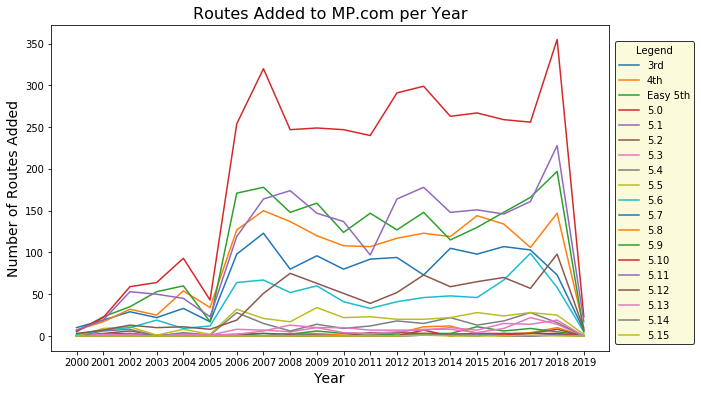

In [6]:
routes_by_submit_date(routes)

# Add discussion

### Average Quality Rating of Routes

Are routes on MP.com generally high or low quality?
We determine this by considering the average rating of routes on MP.com

The average rating of all routes on MP.com is: 2.25

What about by the average rating of each grade? Are some grades considered better than others?

3rd : 2.07
4th : 2.38
Easy 5th : 2.07
5.0 : 1.15
5.1 : 1.3
5.2 : 1.41
5.3 : 1.51
5.4 : 1.69
5.5 : 1.71
5.6 : 1.76
5.7 : 1.94
5.8 : 2.02
5.9 : 2.12
5.10 : 2.3
5.11 : 2.52
5.12 : 2.71
5.13 : 2.89
5.14 : 2.81
5.15 : 2.79


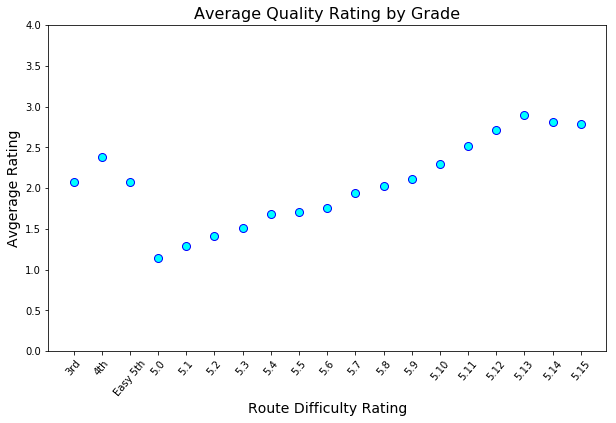

In [7]:
quality_analysis(routes)

# Add discussion

### Best and Worst Routes - EVER

In [8]:
get_best_worst(routes)

Of the 180,000+ routes on MP.com, there is only one route that holds the title of 'Best Route'. 
Which route is it?

We determine this by first filtering the 'routes' dataframe to only include routes with a 4/4 star rating, 
and then sorting these routes by the number of quality votes. The route with the most votes with a 4/4 rating 
is deemed the 'Best Route' on MountainProject.com.

#################
## BEST ROUTES ##
#################

***
The Best Route on MountainProject.com is... Exasperator 5.10c !
The link to Exasperator is here: https://www.mountainproject.com/route/105806955/exasperator
***

There are some notable runner-ups (you may have heard of some of them) they are:
2 : The Nose 5.9 --- https://www.mountainproject.com/route/105924807/the-nose
3 : The North Face 5.11c --- https://www.mountainproject.com/route/105863822/the-north-face
4 : Positive Vibrations 5.11a --- https://www.mountainproject.com/route/105860676/positive-vibrations
5 : The Original Route 5.12- --- https

# Add discussion

## Function Definitions for Analysis

In [18]:
def basic_route_info(routes):
    # List the grades
    simpleGradeList = ['3rd', '4th', 'Easy 5th', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10', '5.11', '5.12', '5.13', '5.14', '5.15']

    # Create a dict with all the grades as keys => The values will be the number of routes
    routesPerGrade = {}
    for i in simpleGradeList:
        routesPerGrade[i] = 0

    # Count the number of routes per grade
    for i in range(len(routes)):
        rating = routes.iloc[i]['simpleDiffRating']
        try:
            routesPerGrade[rating] = routesPerGrade[rating] + 1
        except:
            continue
    
    print("######################")
    print("## BASIC ROUTE INFO ##")
    print("######################\n")
    
    print("There are", len(routes), "routes on MountainProject.com\n")
    print("What does the breakdown look like for type of climb (e.g. Sport, Trad, Boulder)?\n")

    # Separate the respective climbing types
    trad = routes.loc[routes['trad'] == True]
    sport = routes.loc[routes['sport'] == True]
    boulder = routes.loc[routes['boulder'] == True]
    other = len(routes) - len(trad) - len(sport) - len(boulder)
    total = len(trad) + len(sport) + len(boulder)
    
    # Plot as a pie chart
    tot = len(trad) + len(sport) + len(boulder) + other
    tradLen = len(trad)/tot
    sportLen = len(sport)/tot
    boulderLen = len(boulder)/tot
    otherLen = other/tot
    explode = (0.05, 0.05, 0.05, 0.05)
    data = [tradLen, sportLen, boulderLen, otherLen]
    myLabels = ["Trad", "Sport", "Boulder", "Other"]

    fig, ax = plt.subplots(figsize=(10,6))
    ax.pie(data, explode=explode, labels=myLabels, autopct='%1.1f%%')
    ax.set_title("Relative Distribution of Route Types", fontsize=16)
    ax.axis('equal')
    plt.show()

    print("Number of Trad routes:", len(trad))
    print("Number of Sport routes:", len(sport))
    print("Number of Boulder problems:", len(boulder))
    print()
    print("Together this is", total, "climbs. This leaves *about*", len(routes)-total, "routes unaccounted for. \n'About', because some climbs are marked as multiple types (e.g. Trad and Sport). These climbs are made up of the more obscure disciples, let us consider those now.\n")

    aid = routes.loc[(routes['aid'] == True) & (routes['trad'] == False)]
    mixed = routes.loc[(routes['mixed'] == True) & (routes['trad'] == False)]
    ice = routes.loc[(routes['ice'] == True) & (routes['trad'] == False)]
    TR = routes.loc[(routes['TR'] == True) & (routes['trad'] == False) & (routes['sport'] == False) & (routes['boulder'] == False)]
    totalOther = len(aid) + len(mixed) + len(ice) + len(TR)

    print("Number of Aid routes:", len(aid))
    print("Number of Mixed routes:", len(mixed))
    print("Number of Ice routes:", len(ice))
    print("Number of Top-Rope routes:", len(TR))
    print("Together, these comprise", totalOther, "routes. \n\nThis clearly goes over our count of 188,536 routes. \nHowever, this is okay since some routes are marked as multiple types (e.g. 'Top-Rope' and 'Sport').\n")

    total = 0
    for i in range(len(routesPerGrade)):
        total = total + routesPerGrade[simpleGradeList[i]]

    print("We lump all 'roped' routes together by filtering for routes with grades such as 5.* ( Yosemite Decimal System). \nThis removes boulder problems, ice/mixed routes, and most aid-only routes.\n")
    print("Doing so demonstrates that there are", total, "routes rated with the Yosemite Decimal System (YDS).\n")
    
    print("Now we consider number of routes per grade for roped routes:")
    for i in range(len(routesPerGrade)):
        print(simpleGradeList[i], ":", routesPerGrade[simpleGradeList[i]])
    print("Total :", total)
    print()
    
    print("Great! For now, we will focus our analysis on this subset of", total, "routes.\n")


def plot_sport_vs_trad(routes):
    
    print("Now, let us consider the distribution of trad climbs vs sport climbs")
    print()
    
    # CREATE A LIST OF ALL MP GRADES
    with open('./Data/grades.txt') as file:
        reader = file.read()
        grades = []
        tempStr = ""
        for c in reader:
            if c != '\n':
                tempStr = tempStr + c
            else:
                grades.append(tempStr)
                tempStr = ""
                
    # Separate the trad and sport routes
    trad = routes.loc[(routes['trad'] == True) & (routes['sport'] == False)]['diffRating']
    sport = routes.loc[(routes['trad'] == False) & (routes['sport'] == True)]['diffRating']
    
    # GATHER QUANTITY OF EACH ROUTE INTO PRE-DEFINED ROUTE BINS 
    tradDistro = []
    for i in grades:
        tradDistro.append(np.sum(trad == i))

    sportDistro = []
    for i in grades:
        sportDistro.append(np.sum(sport == i))

    # CONVERT MULTIPLE GRADES TO SIMPLE GRADES (e.g. 5.10-/5.10a/5.10c => 5.10)
    simpleGrades = ['3rd', '4th', 'Easy 5th', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10', '5.11', '5.12', '5.13', '5.14', '5.15']
    simpleTrad = [0] * len(simpleGrades)
    simpleSport = [0] * len(simpleGrades)
    for i in range(len(simpleGrades)):
        for j in range(len(grades)):
            if simpleGrades[i] in grades[j] and simpleGrades[i] != '5.1':
                simpleTrad[i] = simpleTrad[i] + tradDistro[j]
                simpleSport[i] = simpleSport[i] + sportDistro[j]
            elif simpleGrades[i] is '5.1' and grades[j] == '5.1':
                simpleTrad[i] = simpleTrad[i] + tradDistro[j]
                simpleSport[i] = simpleSport[i] + sportDistro[j]

    # CHANGE THESE TO ALTER GRAPH (EXPANDED VS COMPRESSED GRADES)
    tradBars = simpleTrad   # CHANGE BTW SIMPLETRAD & TRAD DISTRO
    sportBars = simpleSport # CHANGE BTW SIMPLESPORT & SPORT DISTRO
    labels = simpleGrades   # CHANGE BTW SIMPLEGRADES & GRADES

    # NORMALIZE THE DATA
    normTrad = []
    for i in tradBars:
        normTrad.append(i/np.sum(tradBars))
    normSport = []
    for i in sportBars:
        normSport.append(i/np.sum(sportBars))

    # PLOT THE FIGURE
    fig, ax = plt.subplots(figsize=(10,6))
    ind = np.arange(len(labels))
    width = 0.2
    ax.bar(ind-(width/2), normTrad, width=width, tick_label=labels, color='blue')
    ax.bar(ind+(width/2), normSport, width=width, tick_label=labels, color='grey')
    ax.set_xlabel("Grade", fontsize=14)
    ax.set_ylabel("Relative Grade Density", fontsize=14)
    ax.set_title("Sport vs Trad Grade Distribution", fontsize=16)
    ax.tick_params(axis='x', labelrotation=80, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(["Trad", "Sport"], fontsize=14)

    plt.show()
    
def routes_by_submit_date(routes):
    
    print("It may also be interesting to consider the number of climbs added to MP.com per year, as well as by year")
    
    simpleGrades = ['3rd', '4th', 'Easy 5th', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10', '5.11', '5.12', '5.13', '5.14', '5.15']
    
    routes = routes.dropna()
    # CREATE LIST OF UNIQUE SUBMISSION YEAR VALUES AND SORT THEM
    sortedYears = sorted(routes.subYear.unique())

    # GET DISCRETE NUMBER OF ROUTES ADDED IN 'X' YEAR, DIVIDED BY GRADE
    routesPerYear_Grade = [[np.sum((routes['subYear']==year) & (routes['simpleDiffRating']==grade)) for year in sortedYears] for grade in simpleGrades]

    # GET DISCRETE NUMBER OF ROUTES ADDED IN 'X' YEAR, DIVIDED BY GRADE
    routesPerYear_Grade = [[np.sum((routes['subYear']==year) & (routes['simpleDiffRating']==grade)) for grade in simpleGrades] for year in sortedYears]

    # GET DISCRETE NUMBER OF ROUTES ADDED IN 'X' YEAR ONLY (GRADE NOT CONSIDERED)
    routesPerYear_Total = [np.sum(routes['subYear']==year) for year in sortedYears]
    
    fig, ax = plt.subplots(figsize=(10,6))

    # PLOT THE DATA (X=YEARS, Y=ROUTES_PER_YEAR)
    ax.plot(sortedYears, routesPerYear_Grade)
    # ax.plot(sortedYears, routesPerYear_Total)

    # FORMAT THE GRAPH
    ax.set_title("Routes Added to MP.com per Year", fontsize=16)
    ax.set_ylabel("Number of Routes Added", fontsize=14)
    ax.set_xlabel("Year", fontsize=14)
    ax.legend(simpleGrades, loc=(1.01, 0.02), title="Legend", edgecolor='k', facecolor='lightgoldenrodyellow')
    ax.set_xticks(sortedYears)

    plt.show()
    
def quality_analysis(routes):
    
    # Introduction
    print("Are routes on MP.com generally high or low quality?")
    print("We determine this by considering the average rating of routes on MP.com")
    print()
    
    # Average quality of all routes together
    print("The average rating of all routes on MP.com is:", round(np.mean(routes['avgQualityRating']),2))
    print()
    
    # Quality of routes by grade
    # List the grades
    simpleGradeList = ['3rd', '4th', 'Easy 5th', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10', '5.11', '5.12', '5.13', '5.14', '5.15']

    # Create a dict with all the grades as keys => The values will be the number of routes
    byGrade = {}
    for i in simpleGradeList:
        byGrade[i] = [0, 0]

    # Calculate the average difficulty of routes per grade
    for i in range(len(routes)):
        route = routes.iloc[i]
        grade = route['simpleDiffRating']
        avgRating = route['avgQualityRating']
        try:
            byGrade[grade][0] = byGrade[grade][0] + 1
            byGrade[grade][1] = byGrade[grade][1] + avgRating
            
            # For Calculating a running average
            # byGrade[grade][1] = (byGrade[grade][1]*(byGrade[grade][0]-1) + routes.iloc[i]['avgQualityRating'])/byGrade[grade][0]

        except:
            continue
    for i in byGrade:
        byGrade[i][1] = byGrade[i][1]/byGrade[i][0]
    
    # Print out the results in text form
    print("What about by the average rating of each grade? Are some grades considered better than others?")
    print()

    pointsToPlot = []
    for i in range(len(byGrade)):
        print(simpleGradeList[i], ":", round(byGrade[simpleGradeList[i]][1],2))
        pointsToPlot.append(byGrade[simpleGradeList[i]][1])
                
    # Plot up route difficulty grade vs avg quality rating
    fig, ax = plt.subplots(figsize=(10,6))

    ax.plot(pointsToPlot, marker='.', linestyle='', color='cyan', markersize=16, markeredgecolor='blue')

    ax.set_title("Average Quality Rating by Grade", fontsize=16)
    ax.set_xlabel("Route Difficulty Rating", fontsize=14)
    ax.set_ylabel("Avgerage Rating", fontsize=14)
    ax.set_ylim(0,4)
    ax.set_xticks(np.arange(len(pointsToPlot)))
    ax.set_xticklabels(simpleGradeList, rotation=50)

    plt.show()
    
def get_best_worst(routes):
    
#     Introduction
    print("Of the 180,000+ routes on MP.com, there is only one route that holds the title of 'Best Route'. \nWhich route is it?\n")
    print("We determine this by first filtering the 'routes' dataframe to only include routes with a 4/4 star rating, \nand then sorting these routes by the number of quality votes. The route with the most votes with a 4/4 rating \nis deemed the 'Best Route' on MountainProject.com.\n")
    
    
    print("#################")
    print("## BEST ROUTES ##")
    print("#################\n")
    
    bestRoutes = routes.loc[routes['avgQualityRating'] == 4.0].sort_values(by='numQualityVotes', ascending=False)[:10]
    print("***")
    print("The Best Route on MountainProject.com is...", bestRoutes.iloc[0]['name'], bestRoutes.iloc[0]['diffRating'], "!")
    print("The link to", bestRoutes.iloc[0]['name'], "is here:", bestRoutes.index[0])
    print("***\n")
    
    print("There are some notable runner-ups (you may have heard of some of them) they are:")
    for i in range(1, len(bestRoutes)):
        print(i+1, ":", bestRoutes.iloc[i]['name'], bestRoutes.iloc[i]['diffRating'], "---", bestRoutes.index[i])
    print("---\n")
    
    print("##################")
    print("## WORST ROUTES ##")
    print("##################\n")
    
    print("It follows that we should also find the worst route on MP.com! \n\nTo do so, we follow the same procedure, but only include routes with a 0/4 average rating. \nThe route with the most votes with a 0/4 rating will be awarded the prestigious title of 'Worst Route'.\n")
    
    worstRoutes = routes.loc[routes['avgQualityRating'] == 0.0].sort_values(by='numQualityVotes', ascending=False)[:5]
    print("***")
    print("The Worst Route on MountainProject.com is...", worstRoutes.iloc[0]['name'], worstRoutes.iloc[0]['diffRating'], "!")
    print("The link to", worstRoutes.iloc[0]['name'], "is here:", worstRoutes.index[0])
    print("***\n")
    
    print("For obvious reasons, the worst routes have significantly fewer rating votes from users than do the top routes. \nSuch choss-fests aren't for the faint of heart! However, this does mean that our classification of the 'Worst Route' \nis probably not representative (since the dataset for votes on crappy routes is quite small).\n")
    print("For those disturbed folks who are so inclined to seek out the worst routes, here is a list of the runner-ups:")
    for i in range(1, len(worstRoutes)):
        print(i+1, ":", worstRoutes.iloc[i]['name'], worstRoutes.iloc[i]['diffRating'], "---", worstRoutes.index[i])
    print("---\n")
    

In [16]:
def find_classics(routes):
    routes = routes.loc[(routes['numQualityVotes']>=100) & (routes['avgQualityRating'] >= 3)]
    routes = routes.sort_values(by='numQualityVotes', ascending=False)
    routes = routes[:10]
    for i in range(len(routes)):
        print(routes.iloc[i].index)
    
find_classics(routes)

Index(['name', 'faInfo', 'commentCount', 'photoCount', 'latitude', 'longitude',
       'diffRating', 'avgQualityRating', 'numQualityVotes',
       'desc_aggregateData', 'trad', 'sport', 'boulder', 'aid', 'ice', 'mixed',
       'alpine', 'TR', 'pageViews', 'viewsPerMonth', 'submittedOn', 'subYear',
       'submittedBy', 'votePageUrl', 'lengthFt', 'pitches', 'simpleDiffRating',
       'bc1', 'bc2', 'bc3', 'bc4', 'bc5', 'bc6', 'bc7', 'bc8', 'bc9', 'bc10'],
      dtype='object')
Index(['name', 'faInfo', 'commentCount', 'photoCount', 'latitude', 'longitude',
       'diffRating', 'avgQualityRating', 'numQualityVotes',
       'desc_aggregateData', 'trad', 'sport', 'boulder', 'aid', 'ice', 'mixed',
       'alpine', 'TR', 'pageViews', 'viewsPerMonth', 'submittedOn', 'subYear',
       'submittedBy', 'votePageUrl', 'lengthFt', 'pitches', 'simpleDiffRating',
       'bc1', 'bc2', 'bc3', 'bc4', 'bc5', 'bc6', 'bc7', 'bc8', 'bc9', 'bc10'],
      dtype='object')
Index(['name', 'faInfo', 'commentCount',

## Create list of all areas and routes

In [2]:
routeList = []
areaList = []
crumbs = ['bc1', 'bc2', 'bc3', 'bc4', 'bc5', 'bc6', 'bc7', 'bc8', 'bc9', 'bc10']
for i in range(len(routes)):
    routeList.append(routes.index[i])
    route = routes.iloc[i]
    for bc in crumbs:
        if route[bc] != '':
            areaList.append(route[bc])
    print(i/len(routes), end='\r')
areaList = list(set(areaList))

0.0032301523316501887

0.006269359697882632

0.010178427462129248

0.013159290533372937

0.017200958968048543

0.03396168371027284

0.040321211864047184

0.047370263504052275

0.05555968090974668

0.0661624305172487

0.07018288284465567

0.07411316671617092

0.0778418975686341

0.08206390291509313

0.0871345525522977

0.09001463911401536

0.09493677600033945

0.09845864980693342

0.1085681249204396

0.11100267322951585

0.11386684771078202

0.12181758390970425

0.1293705180973395

0.13656808248822505

0.1456697925064709

0.14908028174990454

0.15228391394746893

0.16157126490431536

0.17104425679976237

0.1801247507107396

0.18398608223363178

0.19025013790469725

0.19337420970000424

0.19816374591589936

0.20132494589892647

0.21192769550642848

0.2225304451139305

0.23294755378283194

0.24108393092035474

0.25168668052785675

0.26228943013535877

0.2728921797428608

0.2834949293503628

0.291445665549285

0.29939640174820725

0.30999915135570927

0.3206019009632113

0.3312046505707133

0.3411550048797047

0.34975813637713754

0.36036088598463956

0.37096363559214157

0.3815663851996436

0.3921691348071456

0.4027718844146476

0.41337463402214963

0.42397738362965165

0.43458013323715367

0.4451828828446557

0.4557856324521577

0.4663883820596597

0.4769911316671617

0.48759388127466374

0.49819663088216576

0.5087993804896678

0.5184049730555438

0.527352866296092

0.537955615903594

0.548558365511096

0.559161115118598

0.569461535197522

0.5777146009250222

0.5883173505325243

0.5989201001400263

0.6095228497475284

0.6201255993550303

0.6307283489625324

0.6413310985700343

0.6519338481775364

0.6625365977850384

0.6731393473925404

0.6837420970000424

0.6943448466075445

0.7049475962150464

0.7155503458225485

0.7261530954300505

0.7367558450375525

0.7473585946450545

0.7579613442525566

0.7685640938600585

0.7791668434675606

0.7897695930750626

0.8003723426825646

0.8109750922900666

0.8215778418975687

0.8321805915050706

0.8427833411125727

0.8533860907200747

0.8639888403275767

0.8745915899350787

0.8851943395425808

0.8957970891500827

0.9063998387575848

0.9170025883650867

0.9276053379725888

0.9382080875800908

0.9488108371875928

0.9594135867950948

0.9700163364025969

0.9806190860100988

0.9912218356176009

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")
        
crumbs = ['bc1', 'bc2', 'bc3', 'bc4', 'bc5', 'bc6', 'bc7', 'bc8', 'bc9', 'bc10']

nodes = []
# Create Nodes
for route in routeList:
    nodes.append(route)
for area in areaList:
    nodes.append(area)

# Add origin node
origin = 'https://www.mountainproject.com/route-guide'
nodes.append(origin)

edges = []
# Create Edges
for i in range(len(routes)):
    route = routes.iloc[i]
    for j in range(len(crumbs)-1):
        if crumbs[j] == 'bc1':
            edges.append((origin, route['bc1']))
        if crumbs[j+1] != '':
            edges.append((route[crumbs[j]], route[crumbs[j+1]]))
        else:
            continue
    print(i/len(routes), end="\r")

0.004306869775533585

0.007218780498154199

0.014490601264479994

0.021889718674417618

0.02984045487333984

0.0332191199558705

0.03779119107226206

0.045588110493486655

0.05234013663173081

0.055008062120762084

0.058959562099545976

0.0740760385284508

0.08133725124114227

0.08538422370263504

0.08814231764755803

0.09609305384648024

0.10035749140747656

0.10404379004540247

0.11464653965290449

0.1215735986761149

0.12966754359910043

0.13559744558068484

0.14234416769211186

0.14543641532651588

0.149096193830356

0.15243773072516656

0.16308291254720583

0.16677451521194891

0.16971294606865533

0.177711418508932

0.18521131242839564

0.1888392667713328

0.19149658420672974

0.19679530699707218

0.20178109220520218

0.2047460431959944

0.2089468324351848

0.21269677939491663

0.2179477659439046

0.22064751559383886

0.22342682564603047

0.2280943692451309

0.23654898799168328

0.24099376246446302

0.2444997241906055

0.25323545635846734

0.26305320999702975

0.27365595960453176

0.2842587092120338

0.2890111172402088

0.292209445410956

0.302812195018458

0.31341494462596003

0.3173929647388297

0.3202306190860101

0.3266644036152247

0.334418890821912

0.3414679424619171

0.3505166122119913

In [ ]:
for i in range(len)

In [21]:
G.add_nodes_from(nodes[:10000])
G.add_node(origin)

Elapsed Time: -9.81040096282959


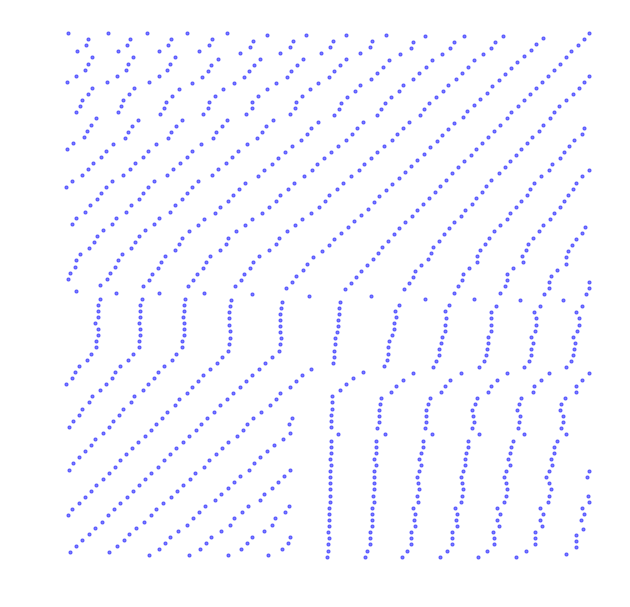

In [25]:
import networkx as nx
import time

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")
        
start = time.time()
pos = graphviz_layout(G, prog='twopi', root=origin, args='')
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=10, alpha=0.5, node_color="blue", with_labels=False)
plt.axis('equal')
end = time.time()
print("Elapsed Time:", round(end-start, 1))
plt.show()